The data we have here is in JSON(JavaScript Object Notation) form. Let's import the json in built module of python

In [1]:
import json

In [2]:
db = json.load(open('database.json'))

As we can see that each entry in db is dict object.

Let's see what keys we have in this database.

In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

We have key values for every single food here. Let's first make a nutrients DataFrame with the help of pandas.

In [4]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [5]:
# DataFrame for nutrients for a single food
import pandas as pd

nutrients = pd.DataFrame(db[0]['nutrients'])

In [6]:
nutrients[:10]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


In [7]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
description    162 non-null object
group          162 non-null object
units          162 non-null object
value          162 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


So we have 162 info objects for each column.

Let's be specific about our data that we are going to deal with. We can seperately extract the data from the database with `pandas.DataFrame(data, columns=[list of names of data to be extracted])`.

In [8]:
# info about the entire data that we are going to deal.
info = pd.DataFrame(db, columns=['description', 'group', 'id', 'manufacturer'])

In [9]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [10]:
info['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

Let's assemble the nutrients for each food into a single large table. For this first we need to make an empty list of nutrients then iterate through every 'nutrients' column and making it DataFrame after this adding an 'id' column to each dataframe and finally append it to empty list of nutrients.

Let's do this:

In [11]:
nutrients = []

for fdata in db:
    nut_dataframe = pd.DataFrame(fdata['nutrients'])
    nut_dataframe['id'] = fdata['id']
    nutrients.append(nut_dataframe)

Now we can concat them in a single dataframe with the `pandas.concat` method.

In [12]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [13]:
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


We can see that there is some duplicate data in group column, let's handle with this first

In [14]:
nutrients.duplicated().sum()

14179

In [15]:
nutrients = nutrients.drop_duplicates()

Now we have common columns **descriprion and group** in our nutrients and info dataframes, let's rename both of these values for merged dataframe.

In [16]:
col_mapping = {'description': 'food', 
              'group' : 'fgroup'}

In [17]:
info = info.rename(columns=col_mapping, copy=False)

In [18]:
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [19]:
nut_mapping = {'description' : 'nutrients',
              'group' : 'nut_group'}

In [20]:
nutrients = nutrients.rename(columns=nut_mapping, copy=False)

In [21]:
nutrients.head()

,nutrients,nut_group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


Now is the time to merge both of dataframes.

In [22]:
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Let's merge them now:

In [23]:
data = pd.merge(nutrients, info, on='id', how='outer')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrients       375176 non-null object
nut_group       375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 17.2+ MB


In [25]:
data.head()

,nutrients,nut_group,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


Let's calculate the top 50% of value of fgroup.

In [26]:
result = data.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)

In [27]:
result

nutrients         fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

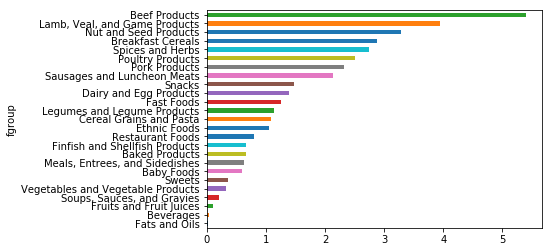

In [29]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

# The End